In [1]:
#import the library
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import seaborn as sns
import logging
import os
os.chdir(r'E:\AAA_Labwork\Tcell tissues\v2')
import importlib
import warnings
warnings.filterwarnings("ignore")

import pickle as pkl
from matplotlib.colors import LinearSegmentedColormap

In [2]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

In [75]:
#This pallete is for colorblinds
my_palette = ['#0351A8','#8CB0E0','#D56D11','#FFBB78','#234E08',
              '#53CB8B','#D30083','#CB788D','#4E195A','#C58CCF',
              '#AA290F','#B03FD1','#E8BCCF','#64605F','#B2AD9A',
              '#D2D30B','#D1BD4F','#06DCF2','#9EDAE5','#517219',
              '#5B43CF','#D92F24','#FFD900','#002F33','#B8A3A3']
donor_palette = ["#cb997e","#ffe8d6","#B2A97D"]
gut_palette = ['#0351A8','#8CB0E0','#D56D11','#FFBB78','#234E08',
              '#53CB8B','#D30083','#CB788D','#4E195A','#C58CCF',
              '#AA290F','#B03FD1','#E8BCCF','#64605F','#B2AD9A']

In [59]:
adata = sc.read_h5ad(r"gut_annotated.h5ad")

In [60]:
adata.obs['Donor ID'] = adata.obs['batch']

In [61]:
adata.obs['Donor ID'] = adata.obs['Donor ID'].map({'3':'Donor AJD3280','4':'Donor AJG2309','5':'Donor AJKQ118'})

In [113]:
adata.obs['celltype_lowres'].values.categories

Index(['T Cells', 'NK', 'ILC', 'B Cells', 'Plasma Cells', 'Monocytes',
       'Macrophages', 'Dendritic Cells', 'Endothelial Cells', 'Telocytes',
       'Fibroblastic Reticular Cells', 'Fibroblast', 'Smooth Muscle Cells',
       'Intestinal Epithelial Cells', 'Neurons'],
      dtype='object')

In [114]:
adata.obs['celltype_lowres'] = adata.obs['celltype_lowres'].astype('category')
ordered_celltype=['T Cells','NK','ILC','B Cells', 'Plasma Cells',
                  'Monocytes','Macrophages','Dendritic Cells', 
                  'Endothelial Cells', 'Telocytes','Fibroblastic Reticular Cells','Fibroblast','Smooth Muscle Cells',
                  'Intestinal Epithelial Cells','Neurons']
adata.obs['celltype_lowres'] = adata.obs['celltype_lowres'].cat.reorder_categories(ordered_celltype)

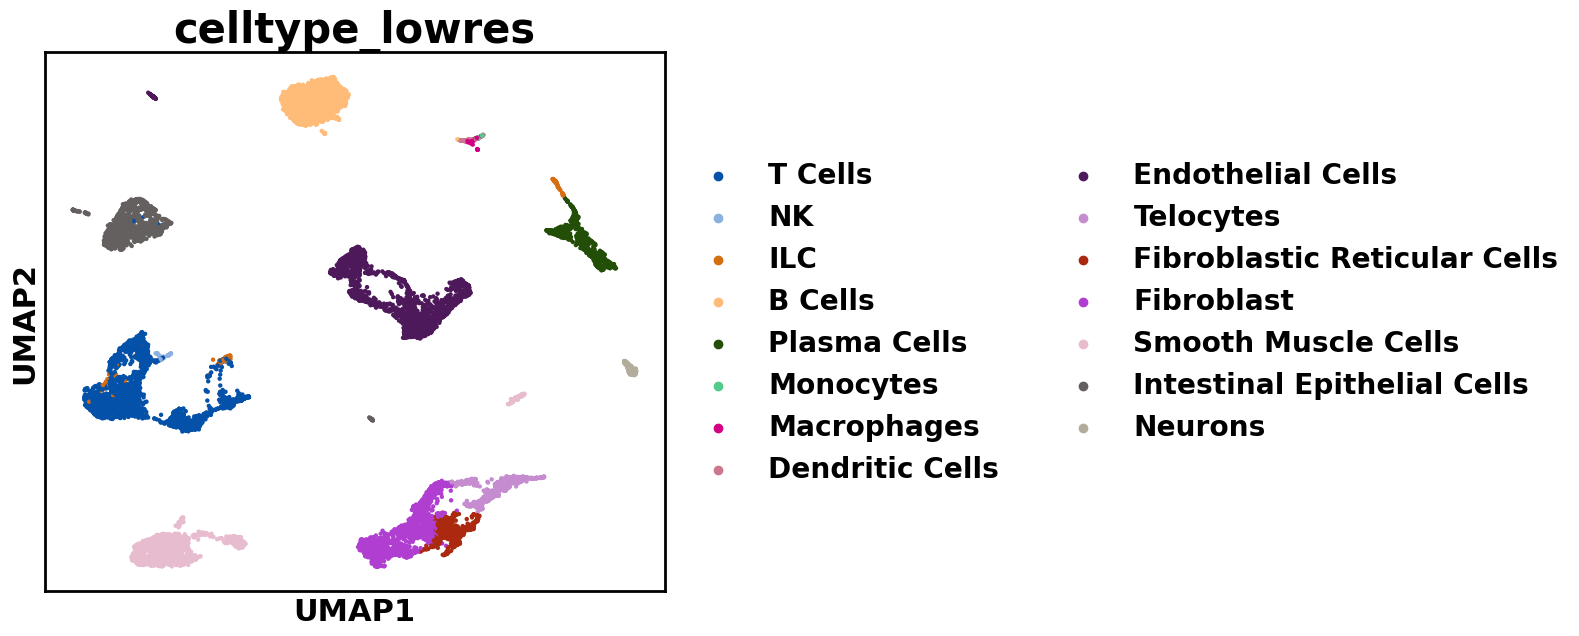

In [115]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['figure.figsize'] = [8,7]

plt.close()
fig = sc.pl.umap(adata, color = ['celltype_lowres'],
                 size = 40, ncols = 1,palette = gut_palette,
                 return_fig = True, legend_fontsize = 'x-large')
ax = fig.get_axes()
for i in range(0,len(ax)):
    ax[i].xaxis.label.set_fontsize(22)
    ax[i].xaxis.label.set_fontweight('bold')
    ax[i].yaxis.label.set_fontsize(22)
    ax[i].title.set_fontsize(30)
    ax[i].yaxis.label.set_fontweight('bold')
    ax[i].title.set_fontweight('bold')

plt.tight_layout()
plt.savefig('vis/gut_celltype_low_umap.png',dpi = 300,bbox_inches='tight')

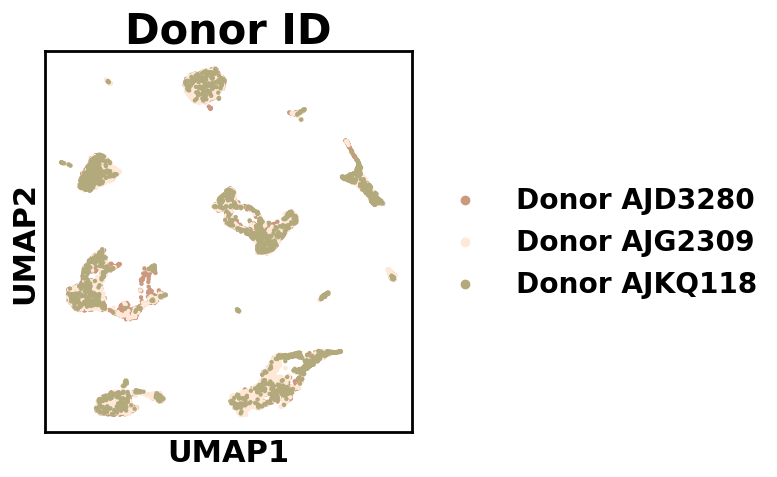

In [119]:
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['figure.figsize'] = [8,5]

plt.close()
fig = sc.pl.umap(adata, color = ['Donor ID'],
                 size = 40, ncols = 1,palette = donor_palette,
                 return_fig = True, legend_fontsize = 'x-large')
ax = fig.get_axes()
for i in range(0,len(ax)):
    ax[i].xaxis.label.set_fontsize(22)
    ax[i].xaxis.label.set_fontweight('bold')
    ax[i].yaxis.label.set_fontsize(22)
    ax[i].title.set_fontsize(30)
    ax[i].yaxis.label.set_fontweight('bold')
    ax[i].title.set_fontweight('bold')

plt.tight_layout()
plt.savefig('vis/gut_donor_umap.png',dpi = 300,bbox_inches='tight')

In [120]:
adata3 = adata[adata.obs['batch']=='3']
adata4 = adata[adata.obs['batch']=='4']
adata34 = adata[adata.obs['batch'].isin(['3','4'])]

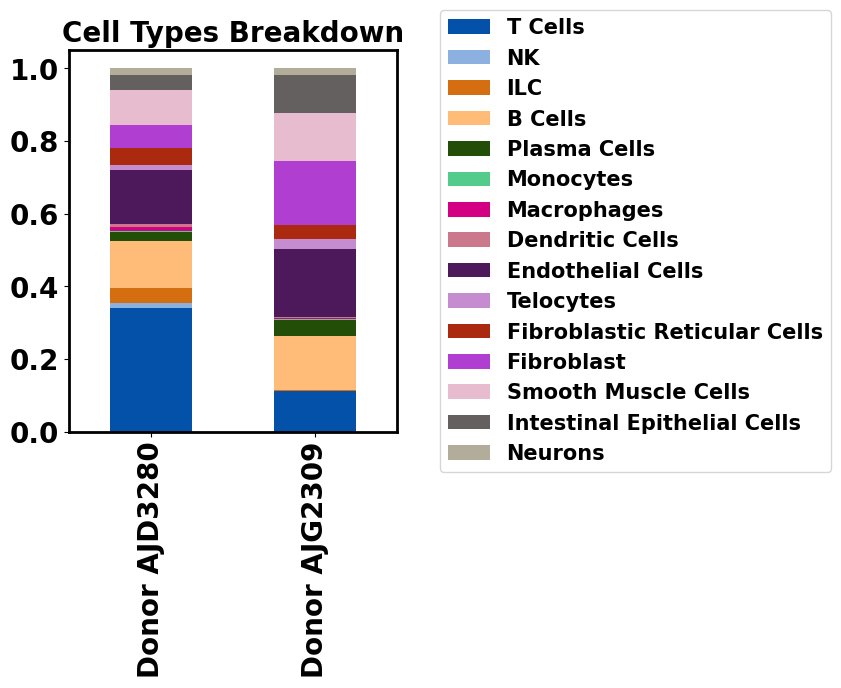

In [121]:
plt.rcParams['figure.figsize'] = [9,7]
plt.rcParams.update({'font.size': 14, 'font.weight': 'bold','axes.linewidth':2})

expand_subtype = pd.DataFrame()
for i in set(adata34.obs['Donor ID']):
    pdtemp = pd.DataFrame(adata34[adata34.obs['Donor ID'] == i,:].obs['celltype_lowres'].value_counts(normalize = True))
    pdtemp = pdtemp.rename({'proportion': i }, axis='columns')
    expand_subtype = pd.concat([expand_subtype, pdtemp], ignore_index=False, axis=1)
expand_subtype = expand_subtype.reindex(index =ordered_celltype)
expand_subtype.transpose().plot.bar(stacked=True,color = adata34.uns['celltype_lowres_colors'],fontsize = 20 ).legend(loc='center left',bbox_to_anchor=(1.1, 0.5),fontsize = 15)
plt.title(label = 'Cell Types Breakdown', fontsize = 20,fontweight = 'bold')
plt.tight_layout()
plt.savefig('vis/gut_celltype_breakdown.png',dpi = 300)

In [112]:
os.chdir(r'E:\AAA_Labwork\Tcell tissues\v2')
adata.write('gut_annotated.h5ad')

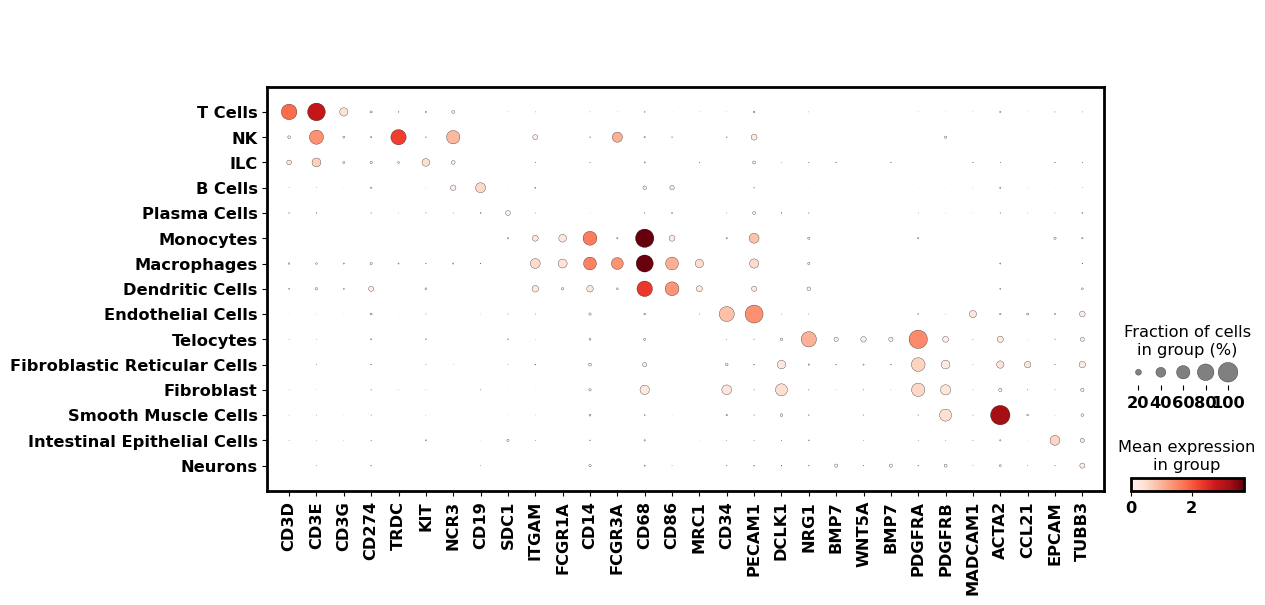

In [125]:
sc.pl.dotplot(adata, var_names=['CD3D','CD3E','CD3G','CD274','TRDC','KIT','NCR3','CD19','SDC1','ITGAM','FCGR1A','CD14','FCGR3A','CD68','CD86','MRC1',
                                'CD34','PECAM1','DCLK1','NRG1','BMP7','WNT5A','BMP7','PDGFRA','PDGFRB','MADCAM1','ACTA2','CCL21','EPCAM','TUBB3'],groupby= 'celltype_lowres')

In [95]:
def DE_to_df(_adata, rank_key, _padj_thresh=0.05, _logfc_thresh=1):
    def process_genes(i, direction):
        _log2foldmask = (_adata.uns[rank_key]['logfoldchanges'][i].astype('double') >= _logfc_thresh) if direction == "up" else (_adata.uns[rank_key]['logfoldchanges'][i].astype('double') <= -_logfc_thresh)
        _pvalmask = _adata.uns[rank_key]['pvals_adj'][i].astype('double') <= _padj_thresh
        _additional = pd.DataFrame({
            i: _adata.uns[rank_key]['names'][i].astype('str')[_log2foldmask & _pvalmask],
            'logfoldchanges_'+i: np.abs(_adata.uns[rank_key]['logfoldchanges'][i].astype('double')[_log2foldmask & _pvalmask])
        })
        _ribo_gene_mask = [gene.startswith('RPL') or gene.startswith('RPS') for gene in _additional[i]]
        _mt_gene_mask = [gene.startswith('MT-') for gene in _additional[i]]
        if len(_ribo_gene_mask)>0 and len(_mt_gene_mask)>0:
            _drop_id = np.array(np.array(_ribo_gene_mask) | np.array(_mt_gene_mask))
            _additional = _additional.sort_values(by='logfoldchanges_'+i, ascending=False)
            _additional = _additional.iloc[_drop_id==False, :].reset_index(drop=True)
        return _additional

    _pass_genes_up = pd.DataFrame()
    _pass_genes_down = pd.DataFrame()

    for i in set(_adata.uns[rank_key]['pvals_adj'].dtype.names):

        _pass_genes_up = pd.concat([_pass_genes_up, process_genes(i, "up")[i]], ignore_index=False, axis=1)
        _pass_genes_down = pd.concat([_pass_genes_down, process_genes(i, "down")[i]], ignore_index=False, axis=1)

        
    return _pass_genes_up, _pass_genes_down

In [97]:
sc.tl.rank_genes_groups(adata, groupby='celltype_lowres', key_added='rank',method = 'wilcoxon')

In [98]:
[pass_genes_up, pass_genes_down] = DE_to_df(adata, rank_key='rank', _padj_thresh = 0.01, _logfc_thresh = 2)

In [123]:
pass_genes_up['Neurons'][0:30]

0         SOX10
1          PLP1
2         GFRA3
3     FOXD3-AS1
4          XKR4
5         GRIK3
6         CDH19
7          SOX2
8        S100A1
9          MYOT
10        NRXN1
11        S100B
12        PCSK2
13       PTPRZ1
14        CADM2
15          MPZ
16    LINC01198
17        SMIM5
18        GPM6B
19      COL28A1
20        L1CAM
21        CRYAB
22       SORCS1
23        TENM3
24       LRRTM4
25       PRIMA1
26        CMTM5
27        SCN7A
28       TUBB2B
29         SPP1
Name: Neurons, dtype: object

In [ ]:
adata.obs['celltype_lowres'] = adata.obs['celltype_lowres'].replace('Telocytes','Telocytes')
adata.obs['celltype_highres'] = adata.obs['celltype_highres'].replace('Telocytes','Telocytes')